<a href="https://colab.research.google.com/github/aminzayer/KNN-Regressor-Evalution/blob/main/KNN_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of KNN in Python KNN-Regressor & KNN Predict & Evalution
## [[3, 4, 5], [6, 9, 7], [2, 4, 5],[1, 3, 2], [7, 7, 7], [5, 6,7], [4, 4 ,8],[2, 2, 2],[3 ,5 ,1]]

## With This Label for Classification=> [1,2,1,1,2,2,2,1,1]

# Manhattan Distance

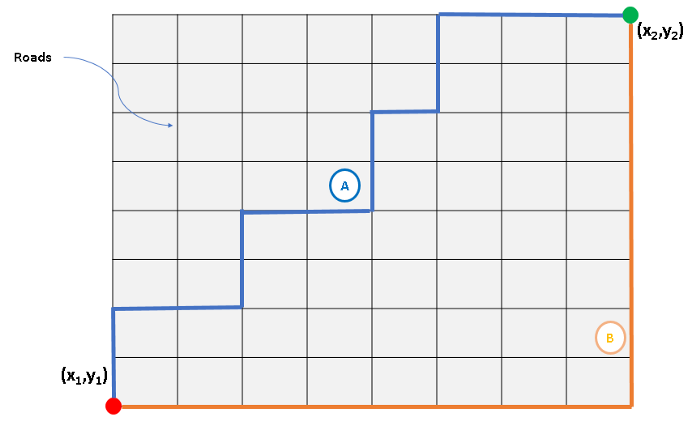

#    Euclidean Distance

![image.png](attachment:image.png)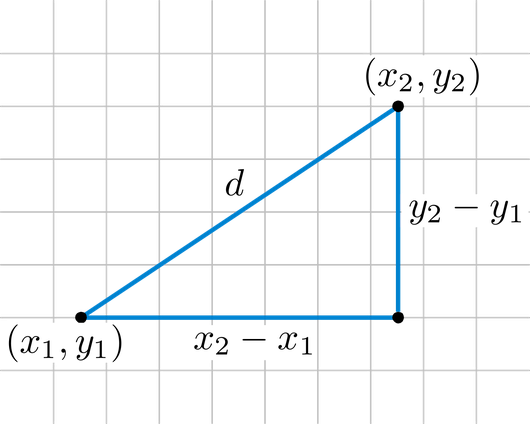

In [ ]:
import pandas as pd
import numpy as np

# Load the Dataset
## Create DataFrame from Data

In [ ]:
# Use Pandas lib for Create Dataframe
MyData = pd.DataFrame([[3, 4, 5, 1],
                       [6, 9, 7, 2],
                       [2, 4, 5, 1],
                       [1, 3, 2, 1],
                       [7, 7, 7, 2],
                       [5, 6, 7, 2],
                       [4, 4 ,8, 2],
                       [2, 2, 3, 1],
                       [3, 5, 1, 1]],columns=['F1', 'F2', 'F3','Label'])
print('Show Our Data')
MyData

Show Our Data


,F1,F2,F3,Label
0,3,4,5,1
1,6,9,7,2
2,2,4,5,1
3,1,3,2,1
4,7,7,7,2
5,5,6,7,2
6,4,4,8,2
7,2,2,3,1
8,3,5,1,1


## Select the Features

In [ ]:
X = MyData.iloc[:,[0,1,2]].values # Features Data
Y = MyData.iloc[:,[3]].values     # Labeled Data

## Split the Data in Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split Test & Train Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 0)

In [ ]:
X_train,Y_train

(array([[3, 5, 1],
        [4, 4, 8],
        [1, 3, 2],
        [3, 4, 5],
        [5, 6, 7]]), array([[1],
        [2],
        [1],
        [1],
        [2]]))

In [ ]:
X_test,Y_test

(array([[2, 2, 3],
        [2, 4, 5],
        [6, 9, 7],
        [7, 7, 7]]), array([[1],
        [1],
        [2],
        [2]]))

### Define Error Metrics
#### As this is a regression problem, we have defined MAPE as the error metrics as shown below

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    Mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return Mape

## Build the Model of KNN Classification

In [ ]:
#Building the KNN.Regressor Model on our dataset
k=3
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=k,metric='euclidean') # euclidean & minkowski & manhattan & 
KNN_model.fit(X_train,Y_train.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

**The following lists the string metric identifiers and the associated distance metric classes:**

**Metrics intended for real-valued vector spaces:**

#### “euclidean”  = > sqrt(sum((x - y)^2))

#### “manhattan” => sum(|x - y|)

#### “chebyshev” => max(|x - y|)

#### “minkowski” => sum(|x - y|^p)^(1/p)

#### “wminkowski” => sum(|w * (x - y)|^p)^(1/p)

#### “seuclidean” => sqrt(sum((x - y)^2 / V))

#### “mahalanobis” => sqrt((x - y)' V^-1 (x - y))

### Predict the testing Data

In [ ]:
KNN_predict = KNN_model.predict(X_test) #Predictions on Testing data

In [ ]:
X_test

array([[2, 2, 3],
       [2, 4, 5],
       [6, 9, 7],
       [7, 7, 7]])

In [ ]:
KNN_predict   # Predicted Values

array([1, 1, 2, 2])

In [ ]:
MyData

,F1,F2,F3,Label
0,3,4,5,1
1,6,9,7,2
2,2,4,5,1
3,1,3,2,1
4,7,7,7,2
5,5,6,7,2
6,4,4,8,2
7,2,2,3,1
8,3,5,1,1


## Accuracy Check For KNN Classification !

In [ ]:
# Using MAPE error metrics to check for the error rate and accuracy level
KNN_MAPE = MAPE(Y_test,KNN_predict)
Accuracy_KNN = 100 - KNN_MAPE
print("MAPE: ",KNN_MAPE)
print('Accuracy of KNN model: {:0.2f}%.'.format(Accuracy_KNN))

MAPE:  37.5
Accuracy of KNN model: 62.50%.


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,KNN_predict)

1.0

## Build the Model of KNN Regressor Classification

In [ ]:
#Building the KNN.Regressor Model on our dataset
k=3
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,Y_train)

### Predict the testing Data

In [ ]:
KNN_predict = KNN_model.predict(X_test) #Predictions on Testing data

In [ ]:
X_test

array([[2, 2, 3],
       [2, 4, 5],
       [6, 9, 7],
       [7, 7, 7]])

In [ ]:
KNN_predict   # Predicted Values

array([[1.        ],
       [1.33333333],
       [1.66666667],
       [1.66666667]])

In [ ]:
MyData

,F1,F2,F3,Label
0,3,4,5,1
1,6,9,7,2
2,2,4,5,1
3,1,3,2,1
4,7,7,7,2
5,5,6,7,2
6,4,4,8,2
7,2,2,3,1
8,3,5,1,1


## Accuracy Check For KNN Regressor Classification!

In [ ]:
# Using MAPE error metrics to check for the error rate and accuracy level
KNN_MAPE = MAPE(Y_test,KNN_predict)
Accuracy_KNN = 100 - KNN_MAPE
print("MAPE: ",KNN_MAPE)
print('Accuracy of KNN model: {:0.2f}%.'.format(Accuracy_KNN))

MAPE:  16.666666666666664
Accuracy of KNN model: 83.33%.


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, np.round(abs(KNN_predict)))

1.0